# Building an Optical Character Recognition (OCR) in Python

## Python OCR Installation

1. Install tesseract using windows installer available at: https://github.com/UB-Mannheim/tesseract/wiki

2. Install the python library
> `pip install pytesseract`

3. Set the tesseract path in the script before calling image_to_string:
> `pytesseract.pytesseract.tesseract_cmd = '<tesseract.exe path>'`

## Python OCR Implementation

In [1]:
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
# Setting environment
%matplotlib inline

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
# Global variables
IMAGE_FILE_DIR = 'images'

## Quick Start with Some Examples 

### Reviewing the image we are going to work with

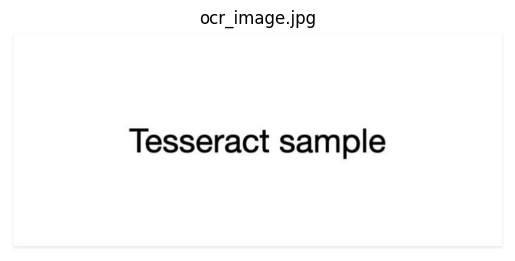

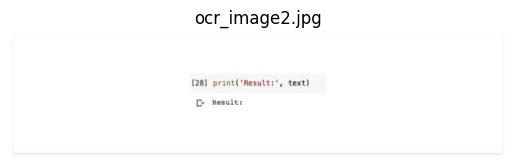

In [4]:
image_file_name = [filename 
                   for filename in os.listdir(IMAGE_FILE_DIR)
                   if filename.endswith(('jpg', 'png'))]
for file_name in image_file_name:
    img = mpimg.imread(f'{IMAGE_FILE_DIR}/{file_name}')
    _ = plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()

### Running tesseracgt to get the text

In [5]:
for file_name in image_file_name:
    img_data = np.array(Image.open(f'{IMAGE_FILE_DIR}/{file_name}'))
    text = pytesseract.image_to_string(img_data)
    print(text)
    print('------------------------------')

Tesseract sample

------------------------------
[28] print(‘Result:', text)

CG Result:

------------------------------


## Working with OpenCV library to deal with noise image
### Reviewing the original image

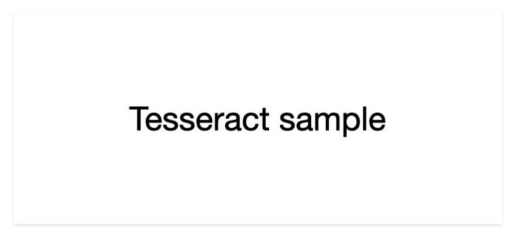

In [6]:
# Reviewing the image
filename = f'{IMAGE_FILE_DIR}/ocr_image.jpg'
img = mpimg.imread(filename)
_ = plt.imshow(img)
plt.axis('off')
plt.show()

### Applying cleaning techniques

In [7]:
# Cleaning noise from the image
# Use a little image processing to eliminate noise in the image. 
# Here, it is used normalization, thresholding and image blur.
norm_img = np.zeros((img.shape[0], img.shape[1]))

clean_img_data = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
clean_img_data = cv2.threshold(clean_img_data, 100, 255, cv2.THRESH_BINARY)[1]
clean_img_data = cv2.GaussianBlur(clean_img_data, (1, 1), 0)

### Reviewing the result

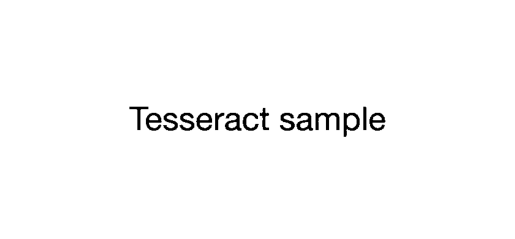

In [8]:
# Viewing the result
# image = cv2.cvtColor(clean_img_data, cv2.COLOR_BGR2RGB)
plt.imshow(clean_img_data)
plt.axis('off')
plt.show()

## Text Localization and Detection in Python OCR
### Loading the image

In [9]:
print(f'Working with `{filename}` image.')

# Loading the image
image = cv2.imread(filename)

Working with `images/ocr_image.jpg` image.


### Extracting metadata

In [10]:
# Convert the image into a dictionary.
results = pytesseract.image_to_data(image, 
                                    output_type=pytesseract.Output.DICT)
results

{'level': [1, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2],
 'left': [0, 195, 195, 195, 195, 441],
 'top': [0, 158, 158, 158, 158, 159],
 'width': [810, 418, 418, 418, 228, 172],
 'height': [358, 50, 50, 50, 40, 49],
 'conf': [-1, -1, -1, -1, 95, 96],
 'text': ['', '', '', '', 'Tesseract', 'sample']}

### Getting the bounding box

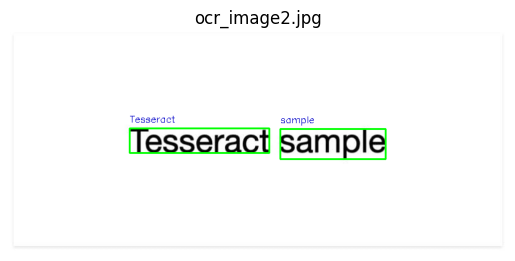

In [11]:
# extract the bounding box coordinates of the 
# text region from the current result, and specify 
# the confidence value. value conf = 70.
box_image = image.copy()
for i in range(len(results['text'])):
   x, y = results['left'][i], results['top'][i]
   w, h = results['width'][i], results['height'][i]

   text = results['text'][i]
   conf = int(results['conf'][i])

   if conf > 70:
       text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
       cv2.rectangle(box_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
       cv2.putText(
           img=box_image, 
           text=text, 
           org=(x, y - 10), 
           fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
           fontScale=0.5, 
           color=(0, 0, 200), 
           thickness=1
       )
plt.imshow(box_image)
plt.title(file_name)
plt.axis('off')
plt.show()

-------------------------------------------